# Importing Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# pip install yellowbrick
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.features import PCA as yPCA

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

# Uploading Train & Test Dataset

In [5]:
#uploading training-dataset
train = pd.read_csv("/Users/elisap/Desktop/DM2/new_train.csv")

#uploading test-dataset
test = pd.read_csv("/Users/elisap/Desktop/DM2/new_test.csv")

def preprocess(df):
    # 1 -> Moving Activity
    # 0 -> Stationary Activity
    # Stationary Activities (Sitting = 4 / Standing = 5 / Laying = 6)
    # Moving Activities (Walking = 1 / Walking_Upstairs  = 2 / Walking_Downstairs = 3)

    df['Activity_cat'] = df['Activity'].map({ 1 : 1,  2 : 1 , 3 : 1,\
                       4 : 0, 5 : 0, 6 : 0})
    df = df.drop(['Activity'], axis=1)
    return df

# Splitting the attributes from the target values

In [6]:
# split train into inputs and outputs
X_train, y_train = train.iloc[:, :-1], train.iloc[:,-1:]
print(X_train.shape, y_train.shape)

(7352, 561) (7352, 1)


In [7]:
# split test into inputs and outputs
X_test, y_test = test.iloc[:, :-1], test.iloc[:,-1:]
print(X_test.shape, y_test.shape)

(2947, 561) (2947, 1)


# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8605361384458772
F1-score [0.86512524 0.80218579 0.8453106  0.80127524 0.83076923 1.        ]
              precision    recall  f1-score   support

           1       0.83      0.91      0.87       496
           2       0.83      0.78      0.80       471
           3       0.87      0.83      0.85       420
           4       0.84      0.77      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



# Principal Component Analysis with yellowbrick

In [10]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y_train)

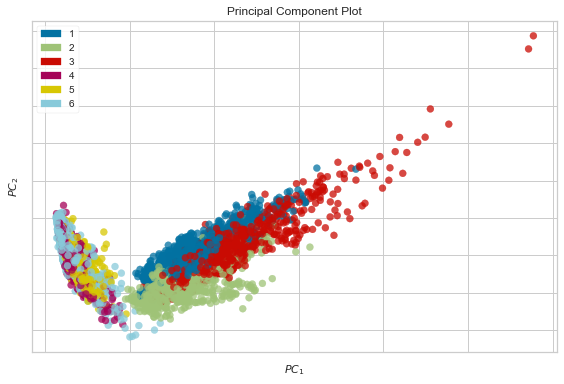

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True,  classes=encoder.classes_)
visualizer.fit_transform(X_train, y)
visualizer.show()

# PCA

In [18]:
from sklearn.decomposition import PCA


In [19]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

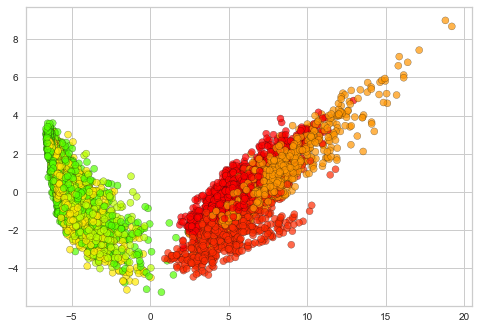

In [20]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.values, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [21]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5188327112317611
F1-score [0.65228216 0.70175439 0.4273743  0.373436   0.47799827 0.46086957]
              precision    recall  f1-score   support

           1       0.55      0.79      0.65       496
           2       0.78      0.64      0.70       471
           3       0.52      0.36      0.43       420
           4       0.35      0.40      0.37       491
           5       0.44      0.52      0.48       532
           6       0.55      0.39      0.46       537

    accuracy                           0.52      2947
   macro avg       0.53      0.52      0.52      2947
weighted avg       0.53      0.52      0.52      2947



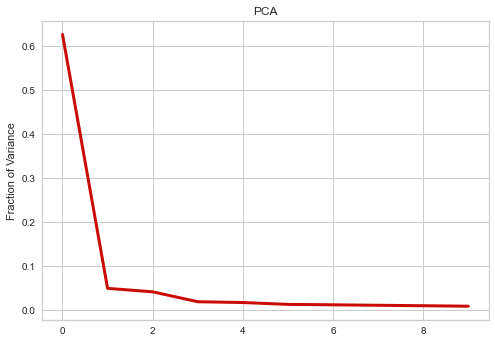

In [22]:
plt.plot(PCA(n_components=10).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Univariate Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest

In [24]:
sel = SelectKBest(k=100)
X_train_sel = sel.fit_transform(X_train, y_train)

X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
 

Accuracy 0.819138106549033
F1-score [0.81048387 0.74537988 0.79455446 0.75       0.79248658 1.        ]
              precision    recall  f1-score   support

           1       0.81      0.81      0.81       496
           2       0.72      0.77      0.75       471
           3       0.83      0.76      0.79       420
           4       0.80      0.71      0.75       491
           5       0.76      0.83      0.79       532
           6       1.00      1.00      1.00       537

    accuracy                           0.82      2947
   macro avg       0.82      0.81      0.82      2947
weighted avg       0.82      0.82      0.82      2947



# Variance Threshold

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(7352, 99)

In [27]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8072616219884629
F1-score [0.79019608 0.73608247 0.80867347 0.72435897 0.76756757 1.        ]
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       496
           2       0.72      0.76      0.74       471
           3       0.87      0.75      0.81       420
           4       0.76      0.69      0.72       491
           5       0.74      0.80      0.77       532
           6       1.00      1.00      1.00       537

    accuracy                           0.81      2947
   macro avg       0.81      0.80      0.80      2947
weighted avg       0.81      0.81      0.81      2947



# Recursive Feature Elimination

In [28]:
from sklearn.feature_selection import SelectFromModel

In [29]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(7352, 34)

In [30]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8527315914489311
F1-score [0.88638498 0.76431718 0.8289638  0.79113924 0.81967213 1.        ]
              precision    recall  f1-score   support

           1       0.83      0.95      0.89       496
           2       0.79      0.74      0.76       471
           3       0.87      0.79      0.83       420
           4       0.82      0.76      0.79       491
           5       0.80      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



# Random Subspace Projection

In [31]:
from sklearn import random_projection

In [32]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(7352, 2)

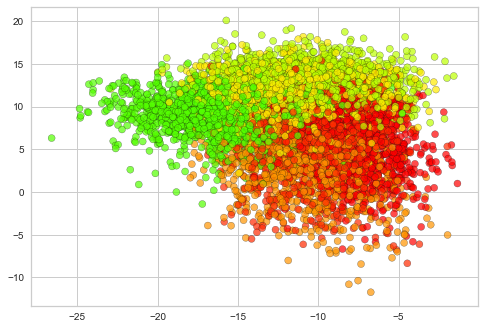

In [33]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train.values, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [34]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42755344418052255
F1-score [0.44288225 0.24336283 0.3856383  0.30351759 0.45943482 0.69444444]
              precision    recall  f1-score   support

           1       0.39      0.51      0.44       496
           2       0.25      0.23      0.24       471
           3       0.44      0.35      0.39       420
           4       0.30      0.31      0.30       491
           5       0.45      0.47      0.46       532
           6       0.74      0.65      0.69       537

    accuracy                           0.43      2947
   macro avg       0.43      0.42      0.42      2947
weighted avg       0.43      0.43      0.43      2947



# IsoMap

IsoMap uses geodesic rather than Euclidian space to measure distance.

In [37]:
from sklearn.manifold import Isomap

In [38]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(7352, 2)

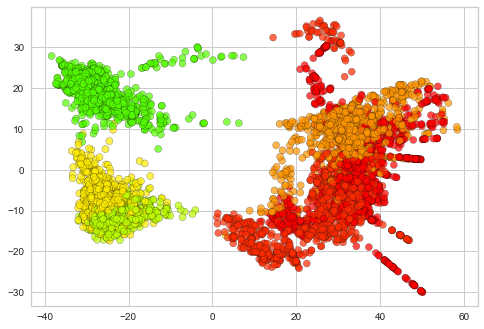

In [40]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train.values, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [41]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9205658324265505
F1-score [0.89707047 0.91631206 0.91031623 0.89355208 0.89918458 0.99751332]
              precision    recall  f1-score   support

           1       0.87      0.92      0.90      1226
           2       0.93      0.90      0.92      1073
           3       0.93      0.89      0.91       986
           4       0.88      0.91      0.89      1286
           5       0.92      0.88      0.90      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.92      7352
   macro avg       0.92      0.92      0.92      7352
weighted avg       0.92      0.92      0.92      7352



# t-SNE

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(7352, 2)

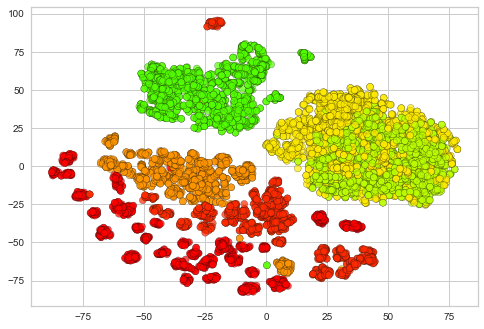

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.values, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [45]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9825897714907508
F1-score [0.99877501 0.99813953 0.9979716  0.95223301 0.95699708 0.99857854]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.95      0.95      0.95      1286
           5       0.96      0.96      0.96      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352

